In [588]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [589]:
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
Y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
Y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [590]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

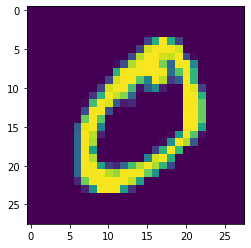

In [591]:
plt.imshow(X_train[1])

In [592]:
X_train_r = np.empty([X_train.shape[0],14,14])
X_test_r = np.empty([X_test.shape[0],14,14])

A = np.zeros((14,28))
for i in range(14):
    A[i,(2*i):(2*i+2)] = 1
for k in range(X_train.shape[0]):
    X_train_r[k,:,:] = A@X_train[k,:,:]@A.T/4
    
for k in range(X_test.shape[0]):
    X_test_r[k,:,:] = A@X_test[k,:,:]@A.T/4
    

In [593]:
X_train_r.shape,X_test_r.shape

((60000, 14, 14), (10000, 14, 14))

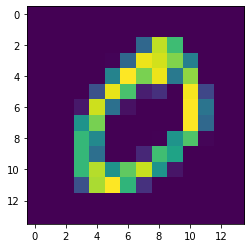

In [594]:
plt.imshow(X_train_r[1])

In [595]:
X_train_ = np.reshape(X_train_r,(60000,14*14))[Y_train<=4,:] # subset
X_test_ = np.reshape(X_test_r,(10000,14*14))[Y_test<=4,:] # subset
X_train_.shape,
X_test_.shape

(5139, 196)

In [465]:
N = 300
np.random.seed(3)
m1, cov1 = [9, 8], [[.5, 0], [0, .5]] ## first gaussian
data1 = np.random.multivariate_normal(m1, cov1, N)
label1 = np.ones(N)

m2, cov2 = [6, 13], [[1, 0], [0, 1]] ## second gaussian
data2 = np.random.multivariate_normal(m2, cov2, 2*N)
label2 = np.ones(N) * 2    

m3, cov3 = [0, 7], [[1.5, 0], [0, 1.5]] ## third gaussian
data3 = np.random.multivariate_normal(m3, cov3, N)
label3 = np.ones(N) * 3

X = np.vstack((data1,np.vstack((data2,data3))))
y = np.concatenate((label1,label2,label3))

In [466]:
# spherical 
n = X.shape[0]
d = 2
mu = np.random.normal(size=(3,2))
pj = 1/3*np.ones(3)
sigma = np.ones(3)
iterations = 0

while 1>0:
    pij = np.zeros((n,3))
    for k in range(3):
        pij[:,k] = np.log(pj[k]/((2*np.pi*sigma[k]**2)**(d/2)))-np.linalg.norm(X-mu[k,:],axis=1)**2/(2*(sigma[k]**2))
        #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
    pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
    pi = np.sum(pij_c, axis=1)
    Fij = pij_c/pi.reshape(-1,1)
    #print(Fij)

    ll1 = log_likelihood(X, 3, pj, mu, sigma)
    print(ll1)
    Fij_s = np.sum(Fij, axis = 0)
    # UPDATE
    #pj = np.sum(Fij, axis=0)/n
    #mu = Fij.T@X_train_/(np.sum(Fij, axis=0).reshape(-1,1))

    for j in range(3):
        pj[j] = Fij_s[j]/n
        mu[j,:] = Fij[:,j].T@X/Fij_s[j]
        sigma[j] = (Fij[:,j].T @ np.linalg.norm(X - mu[j,:],axis=1) / (d*Fij_s[j]))**0.5
    print(pj)

    ll2 = log_likelihood(X, 3, pj, mu, sigma)
    iterations = iterations + 1
    print(abs((ll1-ll2)/ll1))
    if abs((ll1-ll2)/ll1) < 0.0001:
        break
        

-74101.37436129167
[1.89188655e-04 9.98261724e-01 1.54908744e-03]
0.8902947253895194
-8129.311623319539
[0.00402822 0.87211666 0.12385512]
0.186750308300537
-6611.160171393476
[0.10444676 0.66211723 0.23343601]
0.1956893694935989
-5317.426405832293
[0.23287705 0.51812065 0.2490023 ]
0.11269347406877502
-4718.187151054012
[0.25001345 0.50003026 0.24995629]
0.002731293920657956
-4731.073906936213
[0.25013753 0.49986871 0.24999376]
1.941171936814891e-05


In [540]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_)
#kmeans.cluster_centers_

In [ ]:
#from scipy.stats import multivariate_normal
def log_likelihood(X, K, pj, mu, Sigma):
    ll = 0
    for i in range(n):
        aj = np.zeros(K)
        for j in range(K):
            #aj[j] = np.log(pj[j]/(2*np.pi*(sigma[j]**2+0.05))**(d/2))-np.linalg.norm(X_train_[i,:]-mu[j,:])**2/(2*(sigma[j]**2+0.05))
            aj[j] = np.log(pj[j]/((2*np.pi)**(d/2)*(np.prod(Sigma[j]))**0.5))-(X[i,:]-mu[j,:])@np.diagflat(1/Sigma[j])@(X[i,:]-mu[j,:]).T/2
            #aj[j] = np.log(pj[j])+np.log(multivariate_normal.pdf(X[i,:], mean = mu[j,:], cov = Sigma[j]))
        AA = max(aj)
        ll = ll + AA + np.log(np.sum(np.exp(aj-AA)))
        #print(AA + np.log(sum(np.exp(aj-AA))))
    return ll

In [575]:
# spherical: training
K = 5
n = X_train_.shape[0]
d = 14*14
mu = np.copy(kmeans.cluster_centers_)
pj = 1/K*np.ones(K)
sigma0 = np.ones(d)
Sigma = np.repeat(sigma0[None,...],K,axis=0)
iterations = 0

while 1>0:
    pij = np.zeros((n,K))
    for k in range(K):
        pij[:,k] = d*np.log(pj[k]/((2*np.pi*Sigma[k][0]**2)))/2-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(Sigma[k][0]**2))
        #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
    pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
    pi = np.sum(pij_c, axis=1)
    Fij = pij_c/pi.reshape(-1,1)
    #print(Fij)

    ll1 = log_likelihood(X_train_, K, pj, mu, Sigma)
    #print(ll1)
    Fij_s = np.sum(Fij, axis = 0)
    # UPDATE
    #pj = np.sum(Fij, axis=0)/n
    #mu = Fij.T@X_train_/(np.sum(Fij, axis=0).reshape(-1,1))

    for j in range(K):
        pj[j] = Fij_s[j]/n
        mu[j,:] = Fij[:,j].T@X_train_/Fij_s[j]
        Sigma[j] = ((Fij[:,j].T @ np.linalg.norm(X_train_ - mu[j,:],axis=1) / (d*Fij_s[j]))+0.05)**0.5*np.ones(d)
    #print(pj)

    ll2 = log_likelihood(X_train_, K, pj, mu, Sigma)
    iterations = iterations + 1
    print(abs((ll1-ll2)/ll1))
    if abs((ll1-ll2)/ll1) < 0.0001:
        break
        

0.47330773936206566
0.0036549746908081616
0.003959104473520555
0.003780148734020693
0.0033699744710425183
0.0026157534997024163
0.001902183606262571
0.0015210072881454658
0.001217575286388987
0.0011254419836944046
0.001170453432593319
0.0008734270634749751
0.0007444438530151766
0.00013074269962888316
0.0015003316686165434
0.0016332316461005205
0.002683580547721038
0.0017735852670595416
0.0016392744899667389
0.0015424099742866989
0.0017689635788289554
0.0015005482159575981
0.0015623957330530755
0.00157871644012596
0.0017865895900111418
0.001835073823896866
0.002147065109174533
0.002592368507221477
0.0027449856536867737
0.0029357404737814217
0.0030170248451291013
0.003230619208642583
0.0038412400094926555
0.004590146194407625
0.005139332002888776
0.004174886626982894
0.0030943836717469025
0.0023188158746562447
0.0007508608754871422
0.00014646603269345785
1.830944838030836e-05


In [576]:
print(pj)
print(sigma)
print(iterations)

[0.07167604 0.06170741 0.06392993 0.16466077 0.63802585]
[1.98472097 1.44690895 1.90601486 1.87734953 1.98503555]
41


In [577]:
for k in range(K):
    pij[:,k] = d*np.log(pj[k]/((2*np.pi*Sigma[k][0]**2)))/2-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(Sigma[k][0]**2))
    #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
pi = np.sum(pij_c, axis=1)
Fij = pij_c/pi.reshape(-1,1)

In [578]:
import pandas as pd
pd.crosstab(np.argmax(Fij,axis=1), Y_train[Y_train<=4])
#pd.crosstab(aa, Y_train[Y_train<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,0,2154,1,0,4
1,0,1924,0,0,1
2,0,1941,2,7,6
3,4,4,70,12,4926
4,5919,719,5885,6112,905


In [ ]:
aa = np.argmax(Fij,axis=1)
print(aa)
for i in range(len(aa)):
    if aa[i]==4:
        aa[i] = 3
    elif aa[i]==3:
        aa[i] = 4
    elif aa[i]==0:
        aa[i] = 1
    elif aa[i]==1:
        aa[i] = 0

#np.argmax(Fij[:20,:],axis=1), Y_train[Y_train<=4][:20]

In [585]:
sum(aa==Y_train[Y_train<=4])/n # 1-error

0.4312328408942345

In [586]:
pd.crosstab(aa, Y_train[Y_train<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,0,1924,0,0,1
1,0,2154,1,0,4
2,0,1941,2,7,6
3,5919,719,5885,6112,905
4,4,4,70,12,4926


In [563]:
# diagnoal 
K = 5
n = X_train_.shape[0]
d = 14*14
mu = np.copy(kmeans.cluster_centers_)
pj = 1/K*np.ones(K)
sigma0 = np.ones(d)
Sigma = np.repeat(sigma0[None,...],K,axis=0)
iterations = 0

while 1>0:
    pij = np.zeros((n,K))
    for l in range(n):
        for k in range(K):
            pij[l,k] = np.log(pj[k]/((2*np.pi)**(d/2)*(np.prod(Sigma[k]))**0.5))-(X_train_[l,:]-mu[k,:])@np.diagflat(1/Sigma[k])@(X_train_[l,:]-mu[k,:]).T/2
        #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
    pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
    pi = np.sum(pij_c, axis=1)
    Fij = pij_c/pi.reshape(-1,1)
    #print(Fij)

    ll1 = log_likelihood(X_train_, K, pj, mu, Sigma)
    #print(ll1)
    Fij_s = np.sum(Fij, axis = 0)
    # UPDATE

    for j in range(K):
        pj[j] = Fij_s[j]/n
        mu[j,:] = Fij[:,j].T@X_train_/Fij_s[j]
        for p in range(d):
            Sigma[j][p] = ((Fij[:,j].T @ (X_train_[:,p] - mu[j,p])**2 / (d*Fij_s[j]))+0.05)**0.5
    #print(pj)

    ll2 = log_likelihood(X_train_, K, pj, mu, Sigma)
    iterations = iterations + 1
    print(abs((ll1-ll2)/ll1))
    if abs((ll1-ll2)/ll1) < 0.0001:
        break
        

0.8115279447051552
0.0021994307780736993
0.004501607143391075
0.003526727003530064
0.003359166725360494
0.002727391375682484
0.0022598938227245133
0.0017257226895760283
0.0014436300407130482
0.0011461152051540874
0.0009934596090988583
0.0006666887939204043
0.000629724926264301
0.0006269383886448327
0.0004796153208038943
0.00028679425029680644
0.00035101889439850744
0.00023498560146788957
0.00014185751377682909
8.24660344070877e-05


In [567]:
for l in range(n):
    for k in range(K):
        pij[l,k] = np.log(pj[k])-(d/2)*np.log(2*np.pi)-np.log(np.prod(Sigma[k])**0.5)-(X_train_[l,:]-mu[k,:])@np.diagflat(1/Sigma[k])@(X_train_[l,:]-mu[k,:]).T/2
pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
pi = np.sum(pij_c, axis=1)
Fij = pij_c/pi.reshape(-1,1)

In [569]:
pd.crosstab(np.argmax(Fij,axis=1), Y_train[Y_train<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,310,2446,5302,1526,273
1,0,3998,2,12,2
2,139,287,315,4364,46
3,14,11,187,104,5483
4,5460,0,152,125,38


In [ ]:
aa = np.argmax(Fij,axis=1)
for i in range(len(aa)):
    if aa[i]==4:
        aa[i] = 0
    elif aa[i]==3:
        aa[i] = 4
    elif aa[i]==2:
        aa[i] = 3
    elif aa[i]==0:
        aa[i] = 2

In [572]:
pd.crosstab(aa, Y_train[Y_train<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,5460,0,152,125,38
1,0,3998,2,12,2
2,310,2446,5302,1526,273
3,139,287,315,4364,46
4,14,11,187,104,5483


In [573]:
sum(aa==Y_train[Y_train<=4])/n # 1-error

0.804255458229834

### Test set

In [596]:
# spherical: test
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_test_)
K = 5
n = X_test_.shape[0]
d = 14*14
mu = np.copy(kmeans.cluster_centers_)
pj = 1/K*np.ones(K)
sigma0 = np.ones(d)
Sigma = np.repeat(sigma0[None,...],K,axis=0)
iterations = 0

while 1>0:
    pij = np.zeros((n,K))
    for k in range(K):
        pij[:,k] = d*np.log(pj[k]/((2*np.pi*Sigma[k][0]**2)))/2-np.linalg.norm(X_test_-mu[k,:],axis=1)**2/(2*(Sigma[k][0]**2))
        #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
    pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
    pi = np.sum(pij_c, axis=1)
    Fij = pij_c/pi.reshape(-1,1)
    #print(Fij)

    ll1 = log_likelihood(X_test_, K, pj, mu, Sigma)
    #print(ll1)
    Fij_s = np.sum(Fij, axis = 0)
    # UPDATE
    #pj = np.sum(Fij, axis=0)/n
    #mu = Fij.T@X_train_/(np.sum(Fij, axis=0).reshape(-1,1))

    for j in range(K):
        pj[j] = Fij_s[j]/n
        mu[j,:] = Fij[:,j].T@X_test_/Fij_s[j]
        Sigma[j] = ((Fij[:,j].T @ np.linalg.norm(X_test_ - mu[j,:],axis=1) / (d*Fij_s[j]))+0.05)**0.5*np.ones(d)
    #print(pj)

    ll2 = log_likelihood(X_test_, K, pj, mu, Sigma)
    iterations = iterations + 1
    print(abs((ll1-ll2)/ll1))
    if abs((ll1-ll2)/ll1) < 0.0001:
        break
        

0.4717268200327462
0.0029803779481212475
0.0033095060746307727
0.0032022513499373874
0.002835271894490343
0.0025024795787190854
0.0020365517743016555
0.001859820530752659
0.0014196780943755373
0.0013167686145707884
0.0012104571937146488
0.0011239012884632538
0.001248874867347354
0.0017868195233541357
0.0005929130017768189
0.0005031849341304074
0.0034662059318158875
0.003317692264078166
0.002730126906462201
0.0028816855740546542
0.0027394480926919477
0.0027933352334292647
0.0018973951661742535
0.0020046827159751197
0.0018142578694813386
0.0021519247090164067
0.0017105027995647818
0.0016681897323253458
0.0015633489664225668
0.0015502952355554407
0.0014030203315985727
0.0015486016558154507
0.0014382213197689658
0.0014741190523840588
0.001023834070362003
0.0007295687069348197
0.0005454642744043704
0.0006609056292932071
0.0011059806653296496
0.0015652960080795896
0.001967632910491844
0.002565060141360527
0.003598301224555075
0.004389073254202822
0.003597526859074942
0.002324301446218112
0.0

In [599]:
print(pj)
print(iterations)

[0.06518778 0.06363106 0.6417591  0.16462347 0.0647986 ]
56


In [601]:
for k in range(K):
    pij[:,k] = d*np.log(pj[k]/((2*np.pi*Sigma[k][0]**2)))/2-np.linalg.norm(X_test_-mu[k,:],axis=1)**2/(2*(Sigma[k][0]**2))
    #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
pi = np.sum(pij_c, axis=1)
Fij = pij_c/pi.reshape(-1,1)

pd.crosstab(np.argmax(Fij,axis=1), Y_test[Y_test<=4])

[0.06518778 0.06363106 0.6417591  0.16462347 0.0647986 ]
56


col_0,0,1,2,3,4
row_0,,,,,
0,0,334,0,0,0
1,0,327,0,0,0
2,980,140,1022,1006,151
3,0,1,10,4,831
4,0,333,0,0,0


In [608]:
aa = np.argmax(Fij,axis=1)
for i in range(len(aa)):
    if aa[i]==3:
        aa[i] = 4
    elif aa[i]==0:
        aa[i] = 1
    elif aa[i]==1:
        aa[i] = 3
    elif aa[i]==4:
        aa[i] = 0
pd.crosstab(aa, Y_test[Y_test<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,0,333,0,0,0
1,0,334,0,0,0
2,980,140,1022,1006,151
3,0,327,0,0,0
4,0,1,10,4,831


In [609]:
sum(aa==Y_test[Y_test<=4])/n # 1-error

0.425569176882662

In [611]:
# diagnoal: test
K = 5
n = X_test_.shape[0]
d = 14*14
mu = np.copy(kmeans.cluster_centers_)
pj = 1/K*np.ones(K)
sigma0 = np.ones(d)
Sigma = np.repeat(sigma0[None,...],K,axis=0)
iterations = 0

while 1>0:
    pij = np.zeros((n,K))
    for l in range(n):
        for k in range(K):
            pij[l,k] = np.log(pj[k]/((2*np.pi)**(d/2)*(np.prod(Sigma[k]))**0.5))-(X_test_[l,:]-mu[k,:])@np.diagflat(1/Sigma[k])@(X_test_[l,:]-mu[k,:]).T/2
        #pij[:,k] = np.log(pj[k]/((sigma[k]**2+0.05)**(d/2)))-np.linalg.norm(X_train_-mu[k,:],axis=1)**2/(2*(sigma[k]**2+0.05))
    pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
    pi = np.sum(pij_c, axis=1)
    Fij = pij_c/pi.reshape(-1,1)
    #print(Fij)

    ll1 = log_likelihood(X_test_, K, pj, mu, Sigma)
    #print(ll1)
    Fij_s = np.sum(Fij, axis = 0)
    # UPDATE

    for j in range(K):
        pj[j] = Fij_s[j]/n
        mu[j,:] = Fij[:,j].T@X_test_/Fij_s[j]
        for p in range(d):
            Sigma[j][p] = ((Fij[:,j].T @ (X_test_[:,p] - mu[j,p])**2 / (d*Fij_s[j]))+0.05)**0.5
    #print(pj)

    ll2 = log_likelihood(X_test_, K, pj, mu, Sigma)
    iterations = iterations + 1
    print(abs((ll1-ll2)/ll1))
    if abs((ll1-ll2)/ll1) < 0.0001:
        break
        

0.8112495308020625
0.001569064137263364
0.003844623503468938
0.0036616734964009076
0.0032292947615370844
0.00228935777311846
0.0023512933654438457
0.0016565227048603375
0.0012724820276460702
0.0012732175349169366
0.0007798850906193649
0.000617219073041232
0.00029534177022255665
0.00019050795973883736
7.591957126819628e-05


In [612]:
for l in range(n):
    for k in range(K):
        pij[l,k] = np.log(pj[k])-(d/2)*np.log(2*np.pi)-np.log(np.prod(Sigma[k])**0.5)-(X_test_[l,:]-mu[k,:])@np.diagflat(1/Sigma[k])@(X_test_[l,:]-mu[k,:]).T/2
pij_c = np.exp(pij-(np.max(pij, axis=1).reshape(-1,1)))
pi = np.sum(pij_c, axis=1)
Fij = pij_c/pi.reshape(-1,1)

pd.crosstab(np.argmax(Fij,axis=1), Y_test[Y_test<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,0,695,0,1,0
1,12,54,35,801,2
2,942,0,26,9,8
3,3,1,32,16,936
4,23,385,939,183,36


In [615]:
aa = np.argmax(Fij,axis=1)
for i in range(len(aa)):
    if aa[i]==0:
        aa[i] = 1
    elif aa[i]==1:
        aa[i] = 3
    elif aa[i]==2:
        aa[i] = 0
    elif aa[i]==3:
        aa[i] = 4
    else:
        aa[i] = 2
pd.crosstab(aa, Y_test[Y_test<=4])

col_0,0,1,2,3,4
row_0,,,,,
0,942,0,26,9,8
1,0,695,0,1,0
2,23,385,939,183,36
3,12,54,35,801,2
4,3,1,32,16,936


In [616]:
sum(aa==Y_test[Y_test<=4])/n # 1-error

0.8392683401439969